### SDSE Homework 2 — Raj Thimmareddy

In [239]:
# Dependencies

import numpy as np
import sympy as sy
from scipy.stats import norm
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [240]:
# Define the objective function

x1, x2 = sy.symbols('x1 x2')
obj_eq = (x1**3 / 3) - (4*x1) + (x2**3 / 3) - (16*x2)

In [241]:
# Obtain gradient of objective function

df_x1 = sy.diff(obj_eq, x1)
df_x2 = sy.diff(obj_eq, x2)

In [242]:
# Identify stationary points

stat_pts = sy.solve((df_x1, df_x2), (x1, x2))
print("Stationary Points:", stat_pts)

Stationary Points: [(-2, -4), (-2, 4), (2, -4), (2, 4)]


<span style="color:red">
    1.a. Pair of Stationary Points = [(-2, -4), (-2, 4), (2, -4), (2, 4)]
</span>

In [243]:
# Calculating Hessian and its determinant to classify Gradients

d2f_x12 = sy.diff(df_x1, x1)
d2f_x22 = sy.diff(df_x2, x2)
d2f_x1x2 = sy.diff(df_x1, x2)

# hessian = [[d2f_x12, d2f_x1x2], [d2f_x1x2, d2f_x22]]
Hess = sy.Matrix([[d2f_x12, d2f_x1x2], [d2f_x1x2, d2f_x22]])
det_H = Hess.det()

In [244]:
# Classifying Gradients

minima, maxima, saddle = [], [], []

for pt in stat_pts:
    px, py = float(pt[0]), float(pt[1])
    pz = float(obj_eq.subs({x1: px, x2: py}))

    det_H_eval = det_H.subs({x1: px, x2: py})
    f_x1_eval = d2f_x12.subs({x1: px, x2: py})

    if det_H_eval > 0 and f_x1_eval > 0:
        minima.append((px, py, pz))
    elif det_H_eval > 0 and f_x1_eval < 0:
        maxima.append((px, py, pz))
    elif det_H_eval < 0:
        saddle.append((px, py, pz))

minima, maxima, saddle = np.array(minima), np.array(maxima), np.array(saddle)

In [245]:
# Generating a 3D Mesh Grid

X1 = np.linspace(-5, 5, 100)
X2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(X1, X2)

obj_func = sy.lambdify((x1, x2), obj_eq, 'numpy')
OBJ = obj_func(X1, X2)

<span style="color:red">
    1.b. Plotting the Objective Function
</span>

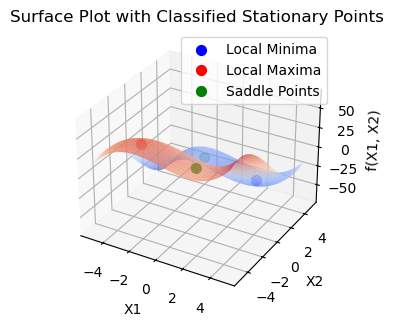

In [246]:
# Plot

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(131, projection='3d')

ax.plot_surface(X1, X2, OBJ, cmap='coolwarm', alpha=0.7)

# Plot stationary points
if minima.size:
    ax.scatter(minima[:, 0], minima[:, 1], minima[:, 2], color='blue', s=50, label='Local Minima')
if maxima.size:
    ax.scatter(maxima[:, 0], maxima[:, 1], maxima[:, 2], color='red', s=50, label='Local Maxima')
if saddle.size:
    ax.scatter(saddle[:, 0], saddle[:, 1], saddle[:, 2], color='green', s=50, label='Saddle Points')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.set_title('Surface Plot with Classified Stationary Points')

# Show legend and plot
ax.legend()
plt.show()

<span style="color:red">
    1.c. NO global solution, only a local solution @ (2, 4). From the plot, it is clear that the function is NOT convex, and as such, the local solution is NOT a global solution
</span>

In [247]:
# Dataset

co2_D = np.array([410.3,415.6,409.8,412.5,416.2,413.9,408.7,414.8])

In [248]:
# Sample Mean

co2_mu_hat = round(sum(co2_D)/len(co2_D), 2)
print(f'Sample Mean = {co2_mu_hat} ppm')

Sample Mean = 412.72 ppm


<span style="color:red">
    2.a. Sample Mean = 412.72 ppm
</span>

In [249]:
# Unbiased Sample Variance

co2_sig_sq = round(sum([(1/(len(co2_D)-1)) * (i - co2_mu_hat)**2 for i in co2_D]), 2)
print(f'Unbiased Sample Variance = {co2_sig_sq} square ppm')

Unbiased Sample Variance = 8.1 square ppm


<span style="color:red">
    2.b. Unbiased Sample Variance = 8.1 square ppm
</span>

In [250]:
# Problem 2 Given

co2_std = 2.5 # ppm
co2_epsilon = 1 # ppm

In [251]:
# Probability that sample mean falls within 1 ppm of true mean (Assuming a gaussian dist.)

# Sample mean assumed to follow a normal dist., and as such, using CLT to determine the probability:
#       P(mu - 1 < mu_hat < mu + 1) = P( -1/(std/root_N)    <   Z-stat  <   1/(std/root_N))

co2_Z_up = co2_epsilon/(co2_std * (len(co2_D)**0.5))
co2_mu_hat_prob = round((norm.cdf(co2_Z_up) - norm.cdf(-co2_Z_up))*100, 2)
print(f'There\'s a probability of {co2_mu_hat_prob}% that the sample mean is within 1 ppm of the true mean')

There's a probability of 11.25% that the sample mean is within 1 ppm of the true mean


<span style="color:red">
    2.c. There's a probability of 11.25% that the sample mean is within 1 ppm of the true mean
</span>

In [252]:
# Min. # of samples req. to ensure the probability of sample mean falling outside 1 ppm from true mean <= 5%

# From Chebyshev's Inequality, we need to find the minimum number of N for which variance of the sample mean over epsilon does not exceed the stated probability

co2_samples_n = 1; co2_cheb_prob = 0

while True:
    co2_cheb_prob = (co2_std**2) / (co2_samples_n * co2_epsilon)

    if co2_cheb_prob > 0.05:
        co2_samples_n += 1
    else:
        break

print(f'Min. # of samples req. to ensure the probability of sample mean falling outside 1 ppm from true mean <= 5% = {co2_samples_n}')

Min. # of samples req. to ensure the probability of sample mean falling outside 1 ppm from true mean <= 5% = 125


<span style="color:red">
    2.d. Min. # of samples req. to ensure the probability of sample mean falling outside 1 ppm from true mean <= 5% = 125
</span>

In [253]:
# Solving previous problem with the assumption that dist. is Gaussian

co2_z_05 = norm.ppf(0.975) # 2.5% attributed to express symmetry of tails in a gaussian distribution
co2_samples_n = int(np.ceil((co2_std * co2_z_05)**2))

print(f'Min. # of samples req. to ensure the probability of sample mean falling outside 1 ppm from true mean <= 5%, for a gaussian dist. = {co2_samples_n}')

Min. # of samples req. to ensure the probability of sample mean falling outside 1 ppm from true mean <= 5%, for a gaussian dist. = 25


<span style="color:red">
    2.e. Min. # of samples req. to ensure the probability of sample mean falling outside 1 ppm from true mean <= 5%, for a gaussian dist. = 25
</span>

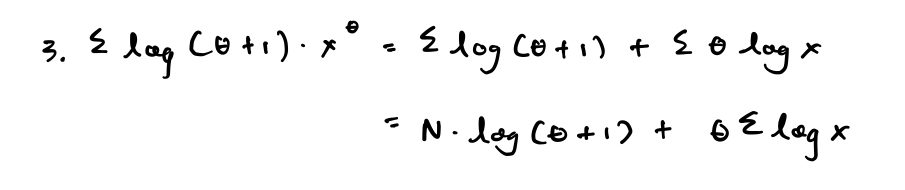

In [254]:
# P3

display(Image(filename="hw2-3.jpeg"))

In [255]:
# MLE of the Beta Dist. Sys.

beta_D = np.array([0.35, 0.85, 0.59, 0.64, 0.57])

beta_theta = sy.Symbol('b_theta', real=True, positive=True)
beta_n = sy.Symbol('b_n', real=True, positive=True)
beta_sum = sy.Symbol('b_s', real=True)

beta_log_l = beta_n * sy.log(beta_theta + 1) + beta_theta * beta_sum
beta_dL_dth = sy.diff(beta_log_l, beta_theta)

beta_theta_hat_sol = sy.solve(beta_dL_dth, beta_theta)[0]
beta_theta_hat = round(beta_theta_hat_sol.subs({beta_n: len(beta_D), beta_sum: sum(np.log(x) for x in beta_D)}).evalf(), 2)

print(f'MLE of theta = {beta_theta_hat}')

MLE of theta = 0.82


<span style="color:red">
    3. MLE of theta = 0.82
</span>

In [256]:
est_alpha = sy.Symbol('est_a', real=True)

est_var_est3_eq = 8*(est_alpha ** 2) - (10 * est_alpha) + 5
est_var_est3 = sy.solve(est_var_est3_eq, est_alpha)

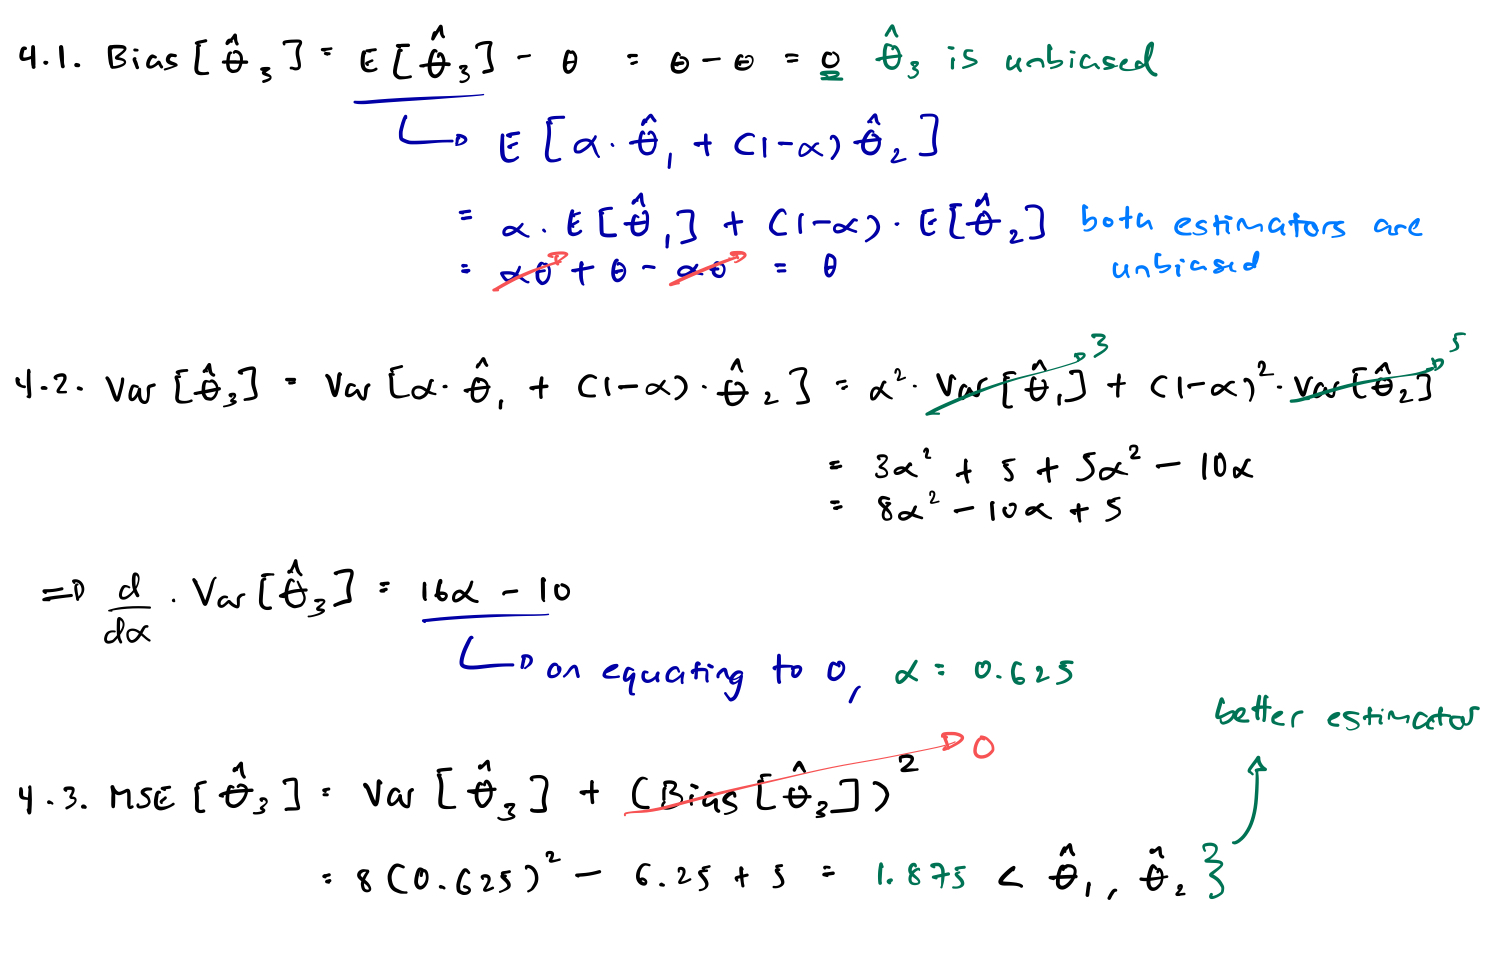

In [257]:
# P4

display(Image(filename="hw2-4.jpeg"))

<span style="color:red">
    4.1. Bias is 0 since it is unbiased
</span>

<span style="color:red">
    4.2. alpha = 0.625
</span>

<span style="color:red">
    4.3. MSE = 1.875 and it is better than the given estimators
</span>

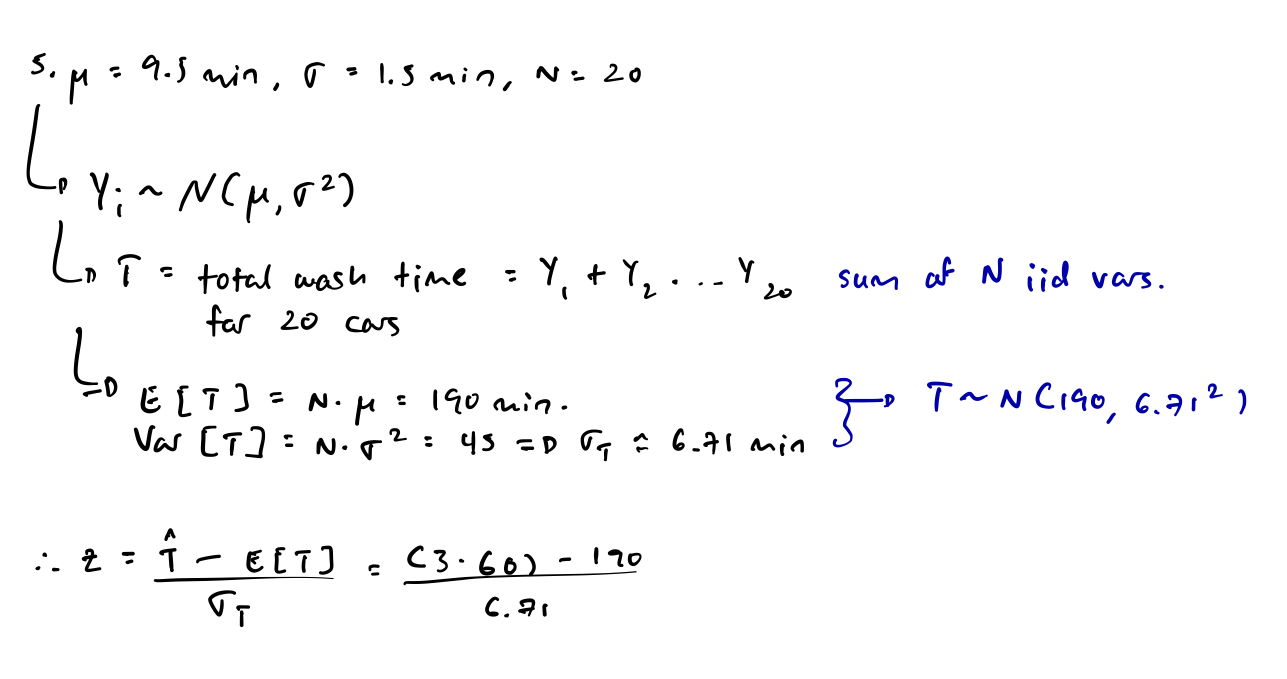

In [258]:
# P5

display(Image(filename="hw2-5.jpeg"))

In [259]:
# Probability that 20 vehicles can be washed in less than 3 hours?

car_z = (180-190) / 6.71
car_prob = round(norm.cdf(car_z)*100, 2)
print(f"Probability that 20 vehicles can be washed in less than 3 hours is {car_prob}%")

Probability that 20 vehicles can be washed in less than 3 hours is 6.81%


<span style="color:red">
    5. Probability that 20 vehicles can be washed in less than 3 hours is 6.81%
<span>